In [2]:
import sqlite3
import pandas as pd
import numpy as np
import tabula
# from PyPDF2 import PdfReader

## BBOE

### pdf 2009
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.bgr.bund.de/EN/Themen/Energie/Downloads/annual_report_2010_en.pdf;jsessionid=D99004DC411C3DC035826F1A502FCBB0.internet961?__blob=publicationFile&v=3

### pdf 2016
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.bgr.bund.de/EN/Themen/Energie/Downloads/energiestudie_2017_en.pdf?__blob=publicationFile&v=2

### pdf 2017
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.bgr.bund.de/EN/Themen/Energie/Downloads/energiestudie_2018_en.pdf?__blob=publicationFile&v=3

### 2018 2020

## Other

### 2018 2020

In [3]:
df = pd.read_excel('DataDict.xlsx')
df = df[df['Units'] != 'BBOE']
df = df[df['new'] != 1]
df

,Variable,Table,Group,SubGroup,Series,CoVaTrA,Cohort,Definition,Extended Source Defn,Units,...,Sheet_name_2018,Column_2018,v,energy,unit,new,Sheet_name_2021,Column_2021,Sheet_name_2022,Column_2022
6,EnCumProdGasBGR,SeriesEnCumProdGasBGR,"Energy, Infrastructure",Production,Yes,No,No,Natural Gas Cumulative Production,NaN,BCM,...,"s. A-15, Natural Gas, 2018 ...",Cum. Production,cumprod,gas,NaN,NaN,"s. A-15, Übersicht Erdgas, ...",Kum. Förderung,"s. A-15, Übersicht Erdgas, ...",Kum. Förderung
7,EnReserCBMBGR,SeriesEnReserCBMBGR,"Energy, Infrastructure",Resources,Yes,No,No,Coalbed methane reserves,NaN,BCM,...,"A-17, Natural gas reserves 2018",CBM: proved reserves,reser,gas,NaN,NaN,"A-17, Erdgasreserven 2021 (...","CBM, Reserven","A-17, Erdgasreserven 2022 (...","CBM, Reserven"
8,EnReserGasBGR,SeriesEnReserGasBGR,"Energy, Infrastructure",Resources,Yes,No,No,Natural gas reserves,NaN,BCM,...,"s. A-15, Natural Gas, 2018 ...",Reserves,reser,gas,NaN,NaN,"s. A-15, Übersicht Erdgas, ...",Reserven,"s. A-15, Übersicht Erdgas, ...",Reserven
9,EnReserShaleGasBGR,SeriesEnReserShaleGasBGR,"Energy, Infrastructure",Resources,Yes,No,No,Shale Gas Reserves,NaN,BCM,...,"A-17, Natural gas reserves 2018",shale gas: proved reserves,reser,gas,NaN,NaN,"A-17, Erdgasreserven 2021 (...",Schiefer Gas: Reserven,"A-17, Erdgasreserven 2022 (...",Schiefer Gas: Reserven
10,EnResorCBMBGR,SeriesEnResorCBMBGR,"Energy, Infrastructure",Resources,Yes,No,No,Coalbed methane Resources,NaN,BCM,...,"A-16, Natural gas resources...",CBM: ressources,resor,gas,NaN,NaN,"A-16, Erdgasressourcen 2021...","CBM, Ressourcen","A-16, Erdgasressourcen 2022...","CBM, Ressourcen"
11,EnResorGasBGR,SeriesEnResorGasBGR,"Energy, Infrastructure",Resources,Yes,No,No,Natural gas resources,NaN,BCM,...,"s. A-15, Natural Gas, 2018 ...",Remaining Potential,resor,gas,NaN,NaN,"s. A-15, Übersicht Erdgas, ...",Verbl. Potenzial,"s. A-15, Übersicht Erdgas, ...",Verbl. Potenzial
12,EnResorShaleGasBGR,SeriesEnResorShaleGasBGR,"Energy, Infrastructure",Resources,Yes,No,No,Shale Gas Resources,NaN,BCM,...,"A-16, Natural gas resources...",shale gas: resources,resor,gas,NaN,NaN,"A-16, Erdgasressourcen 2021...","Schiefer Gas, Ressourcen","A-16, Erdgasressourcen 2022...","Schiefer Gas, Ressourcen"
13,EnResorTightGasBGR,SeriesEnResorTightGasBGR,"Energy, Infrastructure",Resources,Yes,No,No,Tight Gas Resources,NaN,BCM,...,"A-16, Natural gas resources...",tight gas: resources,resor,gas,NaN,NaN,"A-16, Erdgasressourcen 2021...","Tight Gas, Ressourcen","A-16, Erdgasressourcen 2022...","Tight Gas, Ressourcen"
14,EnCumProdOilBGR,SeriesEnCumProdOilBGR,"Energy, Infrastructure",Production,Yes,No,No,Cumulative Production Oil,NaN,Mt,...,"s. A-8, Crude oil, 2018 (Mt)",Cum. Production,cumprod,oil,NaN,NaN,"s. A-8, Übersicht Erdöl, 20...",Kum. Förderung,"s. A-8, Übersicht Erdöl, 20...",Kum. Förderung
16,EnReserHeavyOilBGR,SeriesEnReserHeavyOilBGR,"Energy, Infrastructure",Resources,Yes,No,No,Heavy Oil Reserves,NaN,Mt,...,"A-10, Crude oil reserves 2018",extra heavy oil: proved reserves,reser,oil,NaN,NaN,"A-10, Erdölreserven 2021 (Mt)","Schwerstöl, Reserven","A-10, Erdölreserven 2022 (Mt)","Schwerstöl, Reserven"


In [4]:
for i in df.index:
    v = df.loc[i,'Variable']
    dt = pd.read_excel('energiestudie_2019_tables_en.xlsx', 
                   sheet_name = df.loc[i,'Sheet_name_2018'],
                   )
    dt = dt[['Region', df.loc[i,'Column_2018']]]
    dt.dropna(how = 'all', axis = 0)
    dt = dt.replace('-', 0)
    dt = dt.replace('n. s.','', regex=True)
    dt = dt.replace('n.s.','', regex=True)
    dt = dt.replace('< ','', regex=True)
    dt['year'] = 2018
    dt.rename(columns={df.loc[i,'Column_2018']:v}, inplace=True)

    dd = pd.read_excel('energiedaten_2021_en.xlsx', 
                   sheet_name = df.loc[i,'Sheet_name_2020'],
                   )
    dd = dd[['Region', df.loc[i,'Column_2020']]]
    dd.dropna(how = 'all', axis = 0)
    dd = dd.replace('-', 0)
    dd = dd.replace('n. s.','', regex=True)
    dd = dd.replace('n.s.','', regex=True)
    dd = dd.replace('< ','', regex=True)
    dd['year'] = 2020
    dd.rename(columns={df.loc[i,'Column_2020']:v}, inplace=True)

    data = pd.concat([dt,dd])
    data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
    if v == 'EnCumProdGasBGR':
        final = data
    else:
        final = pd.concat([final, data])
print(final.shape)

(2708, 4)


In [5]:
final

,Region,year,Variable,val
0,Afghaan,2018,EnCumProdGasBGR,58
1,Albania,2018,EnCumProdGasBGR,8
2,Algeria,2018,EnCumProdGasBGR,2674
3,Angola,2018,EnCumProdGasBGR,38
4,Argentina,2018,EnCumProdGasBGR,1299
...,...,...,...,...
68,OPEC,2020,EnResorShaleOilBGR,9425.0
69,OPEC-Gulf,2020,EnResorShaleOilBGR,3280.0
70,OECD,2020,EnResorShaleOilBGR,29527.0
71,EU p. B.,2020,EnResorShaleOilBGR,1471.0


In [6]:
# pd.DataFrame({'Region':list(final.Region.unique())}).to_excel('Country.xlsx', index = False)

### pdf 2009
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.bgr.bund.de/EN/Themen/Energie/Downloads/annual_report_2010_en.pdf;jsessionid=D99004DC411C3DC035826F1A502FCBB0.internet961?__blob=publicationFile&v=3

#### Crude Oil

In [7]:
v1 = 'Oil'
u1 = 'Resor'
u2 = 'Reser'
y1 = 2009

In [8]:
dt1 = tabula.read_pdf('annual_report_2010_en.pdf', 
                      pages= 37,
                      relative_area=True,
                      relative_columns=True,
                      area=[10, 0, 90, 100], 
                      columns= [25, 44, 54, 62, 73, 77]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt2 = tabula.read_pdf('annual_report_2010_en.pdf', 
                      pages= 38,
                      relative_area=True,
                      relative_columns=True,
                      area=[10, 0, 90, 100], 
                      columns= [25, 44, 54, 62, 73, 77]
                      )
dt2 = dt2[0]
print(dt2.shape)
dt2

dt = pd.concat([dt1,dt2], ignore_index=True)
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt

data = dt[['Country / Region', 'Cum.', 'Reserves', 'Remaining']]
data.rename(columns={'Country / Region': 'Region',
                   'Cum.': 'EnCumProdOilBGR',
                   'Reserves': 'EnReserOilBGR',
                   'Remaining': 'EnResorOilBGR',
                   },
                   inplace=True
                   )
data['year'] = 2009
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )

data

final = pd.concat([final, data])
print(final.shape)

(41, 7)
(42, 7)
(2951, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3059285094.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3059285094.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2009


#### Gas

In [9]:
v1 = 'Gas'
u1 = 'Resor'
u2 = 'Reser'
y1 = 2009

In [10]:
dt1 = tabula.read_pdf('annual_report_2010_en.pdf', 
                      pages= 46,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 90, 100], 
                      columns= [25, 44, 54, 62, 73, 77]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt2 = tabula.read_pdf('annual_report_2010_en.pdf', 
                      pages= 47,
                      relative_area=True,
                      relative_columns=True,
                      area=[10, 0, 90, 100], 
                      columns= [25, 44, 54, 62, 73, 77]
                      )
dt2 = dt2[0]
print(dt2.shape)
dt2

dt3 = tabula.read_pdf('annual_report_2010_en.pdf', 
                      pages= 48,
                      relative_area=True,
                      relative_columns=True,
                      area=[10, 0, 90, 100], 
                      columns= [25, 44, 54, 62, 73, 77]
                      )
dt3 = dt3[0]
print(dt3.shape)
dt3

dt = pd.concat([dt1,dt2, dt3], ignore_index=True)
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt

data = dt[['Country / Region', 'Cum.', 'Reserves', 'Remaining']]
data.rename(columns={'Country / Region': 'Region',
                   'Cum.': 'EnCumProdGasBGR',
                   'Reserves': 'EnReserGasBGR',
                   'Remaining': 'EnResorGasBGR',
                   },
                   inplace=True
                   )
data['year'] = 2009
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )

data

final = pd.concat([final, data])
print(final.shape)

(42, 7)
(44, 7)
(42, 7)
(3326, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\4132865857.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\4132865857.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2009


### pdf 2010
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.bgr.bund.de/EN/Themen/Energie/Downloads/annual_report_2011_en.pdf;jsessionid=D99004DC411C3DC035826F1A502FCBB0.internet961?__blob=publicationFile&v=2

#### Crude Oil

In [11]:
v1 = 'Oil'
u1 = 'Resor'
u2 = 'Reser'
y1 = 2010

In [12]:
dt1 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 38,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [25, 44, 53, 61, 72, 77]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1


dt2 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 39,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 49, 56, 66, 73, 80]
                      )
dt2 = dt2[0]
print(dt2.shape)
dt2

dt3 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 40,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 46, 53, 60, 72, 78]
                      )
dt3 = dt3[0]
print(dt3.shape)
dt3

dt4 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 41,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 49, 56, 65, 74, 80]
                      )
dt4 = dt4[0]
print(dt4.shape)
dt4

dt = pd.concat([dt1,dt2,dt3,dt4], ignore_index=True)
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt

data = dt[['Country / Region', 'Cum.', 'Reserves', 'Reamining']]
data.rename(columns={'Country / Region': 'Region',
                   'Cum.': 'EnCumProdOilBGR',
                   'Reserves': 'EnReserOilBGR',
                   'Reamining': 'EnResorOilBGR',
                   },
                   inplace=True
                   )
data['year'] = 2010
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data

final = pd.concat([final, data])
print(final.shape)

(43, 7)
(45, 7)
(44, 7)
(19, 7)
(3770, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3751140462.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3751140462.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2010


#### Crude Oil Resources

In [13]:
v1 = 'Oil'
u1 = 'Resor'
# u2 = 'Reser'
y1 = 2010

In [14]:
dt1 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 42,
                      relative_area=True,
                      relative_columns=True,
                      area=[20, 0, 95, 100], 
                      columns= [16, 29, 63, 73 ]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt = dt1
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt

data = dt[['Country / Region', 'Non-', 'Conventional']]
data.rename(columns={'Country / Region': 'Region',
                   'Non-': 'EnResorOilSandsBGR',
                   'Conventional': 'EnResorHeavyOilBGR',
                #    'Reamining': 'EnResorOilBGR',
                   },
                   inplace=True
                   )
data['year'] = 2010
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data

final = pd.concat([final, data])
print(final.shape)

(39, 5)
(3838, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\442737266.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\442737266.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2010


#### Crude Oil Reserves

In [15]:
v1 = 'Oil'
# u1 = 'Resor'
u2 = 'Reser'
y1 = 2010

In [16]:
dt1 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 43,
                      relative_area=True,
                      relative_columns=True,
                      area=[20, 0, 95, 100], 
                      columns= [21, 34, 69, 77.5 ]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt = dt1
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt

data = dt[['Country / Region', 'Non-', 'Conventional']]
data.rename(columns={'Country / Region': 'Region',
                   'Non-': 'EnReserOilSandsBGR',
                   'Conventional': 'EnReserHeavyOilBGR',
                #    'Reamining': 'EnResorOilBGR',
                   },
                   inplace=True
                   )
data['year'] = 2010
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data

final = pd.concat([final, data])
print(final.shape)

(39, 5)
(3906, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\377987872.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\377987872.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2010


#### Gas

In [17]:
v1 = 'Gas'
u1 = 'Resor'
u2 = 'Reser'
y1 = 2010

In [18]:
dt1 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 48,
                      relative_area=True,
                      relative_columns=True,
                      area=[18, 0, 95, 100], 
                      columns= [25, 44, 53, 61, 72, 77]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1


dt2 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 49,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 49, 56, 66, 73, 80]
                      )
dt2 = dt2[0]
print(dt2.shape)
dt2

dt3 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 50,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 46, 53, 60, 72, 78]
                      )
dt3 = dt3[0]
print(dt3.shape)
dt3

dt4 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 51,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 49, 56, 65, 74, 80]
                      )
dt4 = dt4[0]
print(dt4.shape)
dt4

dt = pd.concat([dt1,dt2,dt3,dt4], ignore_index=True)
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt

data = dt[['Country / Region', 'Cum.', 'Reserves', 'Reamining']]
data.rename(columns={'Country / Region': 'Region',
                   'Cum.': 'EnCumProdGasBGR',
                   'Reserves': 'EnReserGasBGR',
                   'Reamining': 'EnResorGasBGR',
                   },
                   inplace=True
                   )
data['year'] = 2010
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data

final = pd.concat([final, data])
print(final.shape)

(42, 7)
(44, 7)
(45, 7)
(29, 7)
(4371, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\164448159.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\164448159.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2010


#### Gas Resources

In [19]:
v1 = 'Gas'
u1 = 'Resor'
# u2 = 'Reser'
y1 = 2010

In [20]:
dt1 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 52,
                      relative_area=True,
                      relative_columns=True,
                      area=[18, 0, 95, 100], 
                      columns= [16, 29, 63, 73 ]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt = dt1
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt

data = dt[['Country / Region', 'Non-', 'Conventional']]
data.rename(columns={'Country / Region': 'Region',
                   'Non-': 'EnResorShaleGasBGR',
                   'Conventional': 'EnResorCBMBGR',
                   },
                   inplace=True
                   )
data['year'] = 2010
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data

final = pd.concat([final, data])
print(final.shape)

(43, 5)
(4451, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\173586961.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\173586961.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2010


#### Gas Reserves

In [21]:
v1 = 'Gas'
# u1 = 'Resor'
u2 = 'Reser'
y1 = 2010

In [22]:
dt1 = tabula.read_pdf('annual_report_2011_en.pdf', 
                      pages= 53,
                      relative_area=True,
                      relative_columns=True,
                      area=[18, 0, 95, 100], 
                      columns= [21, 34, 69, 77.5 ]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt = dt1
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt

data = dt[['Country / Region', 'Non-', 'Conventional']]
data.rename(columns={'Country / Region': 'Region',
                   'Non-': 'EnReserShaleGasBGR',
                   'Conventional': 'EnReserCBMBGR',
                   },
                   inplace=True
                   )
data['year'] = 2010
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data

final = pd.concat([final, data])
print(final.shape)

(43, 5)
(4529, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\1560158818.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\1560158818.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2010


### pdf 2017
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.bgr.bund.de/EN/Themen/Energie/Downloads/energiestudie_2018_en.pdf?__blob=publicationFile&v=3

#### Crude Oil

In [23]:
v1 = 'Oil'
u1 = 'Resor'
u2 = 'Reser'
y1 = 2017

In [24]:
dt1 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 108,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1


dt2 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 109,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt2 = dt2[0]
print(dt2.shape)
dt2

dt3 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 110,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt3 = dt3[0]
print(dt3.shape)
dt3

dt4 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 111,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt4 = dt4[0]
print(dt4.shape)
dt4

dt = pd.concat([dt1,dt2,dt3,dt4], ignore_index=True)
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt['Country / Region'] = dt['Country / Region'].str.capitalize()
dt

data = dt[['Country / Region', 'Cum.', 'Reserves', 'Remaining']]
data.rename(columns={'Country / Region': 'Region',
                   'Cum.': 'EnCumProdOilBGR',
                   'Reserves': 'EnReserOilBGR',
                   'Remaining': 'EnResorOilBGR',
                   },
                   inplace=True
                   )
data['year'] = 2017
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data.val = data.val.replace(',', '', regex = True)
data

final = pd.concat([final, data])
print(final.shape)

(42, 7)
(43, 7)
(43, 7)
(38, 7)
(5009, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3187209237.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3187209237.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2017


#### Crude Oil Resources

In [25]:
v1 = 'Oil'
u1 = 'Resor'
# u2 = 'Reser'
y1 = 2017

In [26]:
dt1 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 112,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [17, 30, 52, 63, 71, 81 ]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt = dt1
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt['Country / Region'] = dt['Country / Region'].str.capitalize()
dt

data = dt[['Country / Region', 'al', 'non-con', 'ventional']]
data.rename(columns={'Country / Region': 'Region',
                     'al': 'EnResorShaleOilBGR',
                   'non-con': 'EnResorOilSandsBGR',
                   'ventional': 'EnResorHeavyOilBGR',
                   },
                   inplace=True
                   )
data['year'] = 2017
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data = data[~data['Region'].isnull()]
data.val = data.val.replace(',', '', regex = True)
data

final = pd.concat([final, data])
print(final.shape)

(39, 7)
(5114, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\413050897.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\413050897.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2017


#### Crude Oil Reserves

In [27]:
v1 = 'Oil'
# u1 = 'Resor'
u2 = 'Reser'
y1 = 2017

In [28]:
dt1 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 113,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [17, 31, 52.5, 62, 68, 81 ]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt = dt1
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt['Country / Region'] = dt['Country / Region'].str.capitalize()
dt

data = dt[['Country / Region', 'al', 'non-con', 'ventional']]
data.rename(columns={'Country / Region': 'Region',
                     'al': 'EnReserShaleOilBGR',
                   'non-con': 'EnReserOilSandsBGR',
                   'ventional': 'EnReserHeavyOilBGR',
                   },
                   inplace=True
                   )
data['year'] = 2017
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data = data[~data['Region'].isnull()]
data.val = data.val.replace(',', '', regex = True)
data

final = pd.concat([final, data])
print(final.shape)

(41, 7)
(5222, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\145736751.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\145736751.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2017


In [29]:
data[(data['year'] == 2017) & 
      (data['Variable'] == 'EnReserHeavyOilBGR') 
      # & 
      # (data['Region'] == 'Venezuela, bolivaria') 
      ]

,Region,year,Variable,val
75,"Venezuela, bolivaria",2017,EnReserHeavyOilBGR,41900
76,Saudi arabia,2017,EnReserHeavyOilBGR,0
77,Canada,2017,EnReserHeavyOilBGR,0
78,"Iran, islamic repub",2017,EnReserHeavyOilBGR,0
79,Iraq,2017,EnReserHeavyOilBGR,0
80,Russian federation,2017,EnReserHeavyOilBGR,0
81,Kuwait,2017,EnReserHeavyOilBGR,0
82,U. arab emirates,2017,EnReserHeavyOilBGR,0
83,Usa,2017,EnReserHeavyOilBGR,3
84,Libya,2017,EnReserHeavyOilBGR,0


#### Gas

In [30]:
v1 = 'Gas'
u1 = 'Resor'
u2 = 'Reser'
y1 = 2017

In [31]:
dt1 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 118,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1


dt2 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 119,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt2 = dt2[0]
print(dt2.shape)
dt2

dt3 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 120,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt3 = dt3[0]
print(dt3.shape)
dt3

dt4 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 121,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt4 = dt4[0]
print(dt4.shape)
dt4

dt = pd.concat([dt1,dt2,dt3,dt4], ignore_index=True)
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt['Country / Region'] = dt['Country / Region'].str.capitalize()
dt

data = dt[['Country / Region', 'Cum.', 'Reserves', 'Remaining']]
data.rename(columns={'Country / Region': 'Region',
                   'Cum.': 'EnCumProdGasBGR',
                   'Reserves': 'EnReserGasBGR',
                   'Remaining': 'EnResorGasBGR',
                   },
                   inplace=True
                   )
data['year'] = 2017
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data = data[~data['Region'].isnull()]
data.val = data.val.replace(',', '', regex = True)
data

final = pd.concat([final, data])
print(final.shape)

(43, 7)
(41, 7)
(41, 7)
(37, 7)
(5690, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3198415971.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3198415971.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2017


#### Gas  Resources

In [32]:
v1 = 'Gas'
u1 = 'Resor'
# u2 = 'Reser'
y1 = 2017

In [33]:
dt1 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 122,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [20, 32, 54, 66, 75 ]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt = dt1
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt['Country / Region'] = dt['Country / Region'].str.capitalize()
dt

data = dt[['Country / Region', 'al', 'non-conventi', 'onal']]
data.rename(columns={'Country / Region': 'Region',
                     'al': 'EnResorTightGasBGR',
                   'non-conventi': 'EnResorShaleGasBGR',
                   'onal': 'EnResorCBMBGR',
                   },
                   inplace=True
                   )
data['year'] = 2017
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data = data[~data['Region'].isnull()]
data.val = data.val.replace(',', '', regex = True)
data

final = pd.concat([final, data])
print(final.shape)

(38, 6)
(5792, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\2088915550.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\2088915550.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2017


#### Gas Reserves

In [34]:
v1 = 'Gas'
# u1 = 'Resor'
u2 = 'Reser'
y1 = 2017

In [35]:
dt1 = tabula.read_pdf('energiestudie_2018_en.pdf', 
                      pages= 123,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [18, 31, 60, 65.25 ]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1

dt = dt1
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt['Country / Region'] = dt['Country / Region'].str.capitalize()
dt


data = dt[['Country / Region', 'non-', 'conventional 2']]
data.rename(columns={'Country / Region': 'Region',
                   'non-': 'EnReserShaleGasBGR',
                   'conventional 2': 'EnReserCBMBGR',
                   },
                   inplace=True
                   )
data['year'] = 2017
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data = data[~data['Region'].isnull()]
data.val = data.val.replace(',', '', regex = True)
data

final = pd.concat([final, data])
print(final.shape)

(41, 5)
(5860, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3251057514.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3251057514.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2017


### 2016 EnCumProdGasBGR
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.bgr.bund.de/EN/Themen/Energie/Downloads/energiestudie_2017_en.pdf?__blob=publicationFile&v=2

In [36]:
# EnCumProdGasBGR
dt1 = tabula.read_pdf('energiestudie_2017_en.pdf', 
                      pages= 126,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1


dt2 = tabula.read_pdf('energiestudie_2017_en.pdf', 
                      pages= 127,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt2 = dt2[0]
print(dt2.shape)
dt2

dt3 = tabula.read_pdf('energiestudie_2017_en.pdf', 
                      pages= 128,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt3 = dt3[0]
print(dt3.shape)
dt3

dt4 = tabula.read_pdf('energiestudie_2017_en.pdf', 
                      pages= 129,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt4 = dt4[0]
print(dt4.shape)
dt4

dt = pd.concat([dt1,dt2,dt3,dt4], ignore_index=True)
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt['Country / Region'] = dt['Country / Region'].str.capitalize()
dt

data = dt[['Country / Region', 'Cum.', 
        #    'Reserves', 'Remaining'
           ]]
data.rename(columns={'Country / Region': 'Region',
                   'Cum.': 'EnCumProdGasBGR',
                #    'Reserves': 'EnReserGasBGR',
                #    'Remaining': 'EnResorGasBGR',
                   },
                   inplace=True
                   )
data['year'] = 2016
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data = data[~data['Region'].isnull()]
data

final = pd.concat([final, data])
print(final.shape)

(43, 7)
(42, 7)
(42, 7)
(37, 7)
(6018, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3556761383.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\3556761383.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2016


### 2016 EnCumProdOilBGR

In [42]:
# EnCumProdOilBGR
dt1 = tabula.read_pdf('energiestudie_2017_en.pdf', 
                      pages= 116,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt1 = dt1[0]
print(dt1.shape)
dt1


dt2 = tabula.read_pdf('energiestudie_2017_en.pdf', 
                      pages= 117,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt2 = dt2[0]
print(dt2.shape)
dt2

dt3 = tabula.read_pdf('energiestudie_2017_en.pdf', 
                      pages= 118,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt3 = dt3[0]
print(dt3.shape)
dt3

dt4 = tabula.read_pdf('energiestudie_2017_en.pdf', 
                      pages= 119,
                      relative_area=True,
                      relative_columns=True,
                      area=[15, 0, 95, 100], 
                      columns= [29, 44, 53, 61, 72, 77]
                      )
dt4 = dt4[0]
print(dt4.shape)
dt4

dt = pd.concat([dt1,dt2,dt3,dt4], ignore_index=True)
dt = dt.dropna(thresh=3)
dt = dt.replace('–', 0)
dt = dt.replace('n. s.','', regex=True)
dt = dt.replace('n.s.','', regex=True)
dt = dt.replace('. n. s.','', regex=True)
dt = dt.replace(' n. s.','', regex=True)
dt = dt.replace('< ','', regex=True)
dt['Country / Region'] = dt['Country / Region'].str.capitalize()
dt

data = dt[['Country / Region', 'Cum.', 
        #    'Reserves', 'Remaining'
           ]]
data.rename(columns={'Country / Region': 'Region',
                   'Cum.': 'EnCumProdOilBGR',
                   },
                   inplace=True
                   )
data['year'] = 2016
data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
data = data[~data['Region'].isnull()]
data

final = pd.concat([final, data])
print(final.shape)

(42, 7)
(44, 7)
(43, 7)
(38, 7)
(6179, 4)


C:\Users\panda\AppData\Local\Temp\ipykernel_22828\4111359794.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country / Region': 'Region',
C:\Users\panda\AppData\Local\Temp\ipykernel_22828\4111359794.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = 2016


### 2021 - 2022

In [43]:
for i in df.index:
    v = df.loc[i,'Variable']
    dt = pd.read_excel('energiedaten_2022.xlsx', 
                   sheet_name = df.loc[i,'Sheet_name_2021'],
                   )
    dt = dt[['Region', df.loc[i,'Column_2021']]]
    dt.dropna(how = 'all', axis = 0)
    dt = dt.replace('-', 0)
    dt = dt.replace('k.A.','', regex=True)
    # dt = dt.replace('n.s.','', regex=True)
    dt = dt.replace('< ','', regex=True)
    dt['year'] = 2021
    dt.rename(columns={df.loc[i,'Column_2021']:v}, inplace=True)

    dd = pd.read_excel('energiedaten_2023.xlsx', 
                   sheet_name = df.loc[i,'Sheet_name_2022'],
                   )
    dd = dd[['Region', df.loc[i,'Column_2022']]]
    dd.dropna(how = 'all', axis = 0)
    dd = dd.replace('-', 0)
    dd = dd.replace('k.A.','', regex=True)
    # dd = dd.replace('n.s.','', regex=True)
    dd = dd.replace('< ','', regex=True)
    dd['year'] = 2022
    dd.rename(columns={df.loc[i,'Column_2022']:v}, inplace=True)

    data = pd.concat([dt,dd])
    data = data.melt(
    id_vars=['Region','year'],
    var_name= 'Variable',
    value_name = 'val',
    )
    final = pd.concat([final, data])
print(final.shape)

(8896, 4)


In [44]:
pd.DataFrame({'Region':list(final.Region.unique())}).to_excel('Country3.xlsx', index = False)

# Manipulate final table before join with IFs Hist

In [41]:
# final[final.duplicated(subset=['Region','year','Variable'],keep=False)]
# pd.DataFrame({'Region':list(final.Region.unique())}).to_excel('CountryAgain.xlsx', index = False)
# final[final['Region'] == 'Tua']

In [45]:
final[(final['year'] == 2017) & 
      (final['Variable'] == 'EnReserHeavyOilBGR') 
      & 
      (final['Region'] == 'Venezuela, bolivaria') 
      ]

,Region,year,Variable,val
75,"Venezuela, bolivaria",2017,EnReserHeavyOilBGR,41900


In [48]:
table = final

In [49]:
table = table.drop_duplicates(subset=['Region','year','Variable'])
table.val = table.val.replace(',', '', regex = True)
table = table.replace('k.A.','', regex=True)
table = table.replace('–', 0)
table = table.replace('-', 0)
table = table.replace('n. s.','', regex=True)
table = table.replace('n.s.','', regex=True)
table = table.replace('n.s. ','', regex=True)
table = table.replace('. n. s.','', regex=True)
table = table.replace(' n. s.','', regex=True)
table = table.replace('n.s','', regex=True)
table = table.replace('< ','', regex=True)
table = table.replace(' < ','', regex=True)
table = table[~table['Region'].isnull()]
print(table.shape)
table = table[~table['val'].isnull()]
print(table.shape) 
country = pd.read_excel('Country.xlsx')
table = country.merge(table, on = 'Region', how = 'left')
table.val = table.val.apply(pd.to_numeric, errors='coerce') 
table.drop(columns=['Region'], inplace=True)
table = table.sort_values(by=['Variable','Country','year'])
table

C:\Users\panda\AppData\Local\Temp\ipykernel_22828\2292312523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.val = table.val.replace(',', '', regex = True)


(8821, 4)
(8810, 4)


,Country,FIPS_CODE,year,Variable,val
15,Afghanistan,AFG,2009.0,EnCumProdGasBGR,56.0
21,Afghanistan,AFG,2010.0,EnCumProdGasBGR,0.0
30,Afghanistan,AFG,2016.0,EnCumProdGasBGR,58.0
27,Afghanistan,AFG,2017.0,EnCumProdGasBGR,58.0
0,Afghanistan,AFG,2018.0,EnCumProdGasBGR,58.0
...,...,...,...,...,...
2940,Indonesia,IDN,NaN,NaN,NaN
4488,Netherlands,NLD,NaN,NaN,NaN
5015,Philippines,PHL,NaN,NaN,NaN
6435,Tunisia,TUN,NaN,NaN,NaN


# Join with IFsHist

In [50]:
df = pd.read_excel('DataDict.xlsx')
df = df[df['Units'] != 'BBOE']
df = df[df['new'] != 1]

# connect to database
con = sqlite3.connect(r"C:\Users\Public\IFs\DATA\IFsHistSeries.db")
sql_query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""
# create cursor object
cursor = con.cursor()
# execute the above SQL query
cursor.execute(sql_query)

for i in df.index:
    v = df.loc[i,'Variable']
    dt = table[table['Variable'] == v]
    dt = dt[["Country","FIPS_CODE","year","val"]]

    tbname = 'Series'+ v
    # use pands read sql table into dataframe
    dt_ifs = pd.read_sql_query(f"SELECT * FROM '{tbname}'", con)
    dt_ifs = dt_ifs.drop(columns=['Earliest','MostRecent'])
    dt_ifs = dt_ifs.melt(id_vars= ["Country","FIPS_CODE"],var_name="year",value_name="val")
    dt_ifs.year = dt_ifs.year.apply(pd.to_numeric, errors='coerce')
    dt_ifs.val = dt_ifs.val.apply(pd.to_numeric, errors='coerce')

    dd = pd.concat([dt,dt_ifs])
    dd.year = dd.year.replace(2105, 2015)
    dd = dd.sort_values(by=['Country','year'])
    print(v, str(dd.year.min()) + '-2018,', "2020-" + str(dd.year.max()))
    first_last = dd.sort_values(['Country','year']).groupby(dd['Country'])['val'] \
        .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    dd.year = dd.year.astype(int)
    dd = dd.pivot_table(index = ['Country','FIPS_CODE'],
                    columns='year',
                    values = 'val').reset_index()
    dd = dd.merge(first_last,
                on = 'Country',
                how = 'left')
    country = pd.read_excel('Country.xlsx', sheet_name='IFs')
    dd = country.merge(dd,
                        on = ['Country','FIPS_CODE'],
                        how = 'left')
    # print(dd.shape, dd.columns)
    dd.to_csv(f'IFs Import/{v}.csv', index= False)

    # data = dd.drop(columns=['Earliest','MostRecent'])
    # data = data.melt(id_vars= ["Country","FIPS_CODE"],var_name="year",value_name="val")
    # data = data[['Country','year','val']]
    # data = pd.pivot_table(data,
    #                 index = 'year',
    #                 columns= ['Country'],
    #                 values='val')
    # import matplotlib.pyplot as plt
    # lines = data.plot.line(figsize=(20, 10))
    # plt.axvline(2019,
    #             color='r', 
    #             linestyle='--', 
    #             lw=2)
    # plt.title(f"{v}")
    # plt.show()
    


con.close()


EnCumProdGasBGR 2009.0-2018, 2020-2022.0
EnReserCBMBGR 2010.0-2018, 2020-2022.0
EnReserGasBGR 2009.0-2018, 2020-2022.0
EnReserShaleGasBGR 2010.0-2018, 2020-2022.0
EnResorCBMBGR 2010.0-2018, 2020-2022.0
EnResorGasBGR 2009.0-2018, 2020-2022.0
EnResorShaleGasBGR 2010.0-2018, 2020-2022.0
EnResorTightGasBGR 2011.0-2018, 2020-2022.0
EnCumProdOilBGR 2009.0-2018, 2020-2022.0
EnReserHeavyOilBGR 2010.0-2018, 2020-2022.0
EnReserOilBGR 2009.0-2018, 2020-2022.0
EnReserOilSandsBGR 2011.0-2018, 2020-2016.0
EnReserShaleOilBGR 2011.0-2018, 2020-2022.0
EnResorHeavyOilBGR 2010.0-2018, 2020-2022.0
EnResorOilBGR 2009.0-2018, 2020-2022.0
EnResorOilSandsBGR 2011.0-2018, 2020-2016.0
EnResorShaleOilBGR 2011.0-2018, 2020-2022.0


In [1]:
table[(table['year'] == 2017) & 
      (table['Variable'] == 'EnReserHeavyOilBGR') 
      & 
      (table['Country'] == 'Venezuela, Bolivarian Republic') 
      ]

NameError: name 'table' is not defined

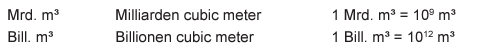

# Import

In [3]:
dd = pd.read_csv("DataDict.csv", encoding='windows-1252')
conn = sqlite3.connect('IFsDataImport.db')
cursor = conn.cursor()
#
for tb in dd.Table:
    v = tb.replace("Series","")
    #v = v.replace("Rev23","")
    print(v)
    dt = pd.read_csv(f"IFs Import/{v}.csv")
    sql_drop_table = f"DROP TABLE IF EXISTS [{tb}];"
    sql_create_table = f"CREATE TABLE [{tb}] (Country VARCHAR (255), FIPS_CODE VARCHAR (255), "
    for c in dt.columns[2:]:
        sql_create_table += f"[{c}] DOUBLE(53),"
    sql_create_table = sql_create_table[:-1] + ");"
    cursor.execute(sql_drop_table)
    cursor.execute(sql_create_table)
    dt.to_sql(name=f'{tb}', con=conn, if_exists="append", index=False)
    conn.commit()
#dd_update.to_sql(name=f'DataDict', con=conn, if_exists="replace", index=False)
conn.close()

EnCumProdGasBGR
EnReserCBMBGR
EnReserGasBGR
EnReserShaleGasBGR


EnResorCBMBGR
EnResorGasBGR
EnResorShaleGasBGR
EnResorTightGasBGR
EnCumProdOilBGR
EnReserHeavyOilBGR
EnReserOilBGR
EnReserOilSandsBGR
EnReserShaleOilBGR
EnResorHeavyOilBGR
EnResorOilBGR
EnResorOilSandsBGR
EnResorShaleOilBGR
